In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()

api.authenticate()

datasets = api.dataset_list(search='asaniczka/1-3m-linkedin-jobs-and-skills-2024')

for dataset in datasets:
    print(f"Title: {dataset.title}")
    print(f"Owner: {dataset.ownerName}")
    print(f"URL: https://www.kaggle.com/{dataset.ref}")
    print("\n")

# Download a dataset
# The first argument is the dataset identifier in the format of 'username/dataset'
# The second argument is the path where you want to download the dataset
api.dataset_download_files('asaniczka/1-3m-linkedin-jobs-and-skills-2024', path='C:/projects/linkedin-job-data-analysis/data/', unzip=True)

print("Dataset downloaded successfully!")


Title: 1.3M Linkedin Jobs & Skills (2024)
Owner: asaniczka
URL: https://www.kaggle.com/asaniczka/1-3m-linkedin-jobs-and-skills-2024


Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
Dataset downloaded successfully!


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/projects/linkedin-job-data-analysis/data/linkedin_job_postings.csv')

In [51]:
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [52]:
df2 = pd.read_csv('C:/projects/linkedin-job-data-analysis/data/job_skills.csv')

In [53]:
df2

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


In [54]:
all = pd.merge(df, df2, on='job_link')

In [55]:
all

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c..."
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est..."
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o..."
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse..."


In [56]:
all = all.dropna()
all = all.drop(['got_summary', 'got_ner', 'is_being_worked'], axis=1)

In [57]:
all

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c..."
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est..."
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o..."
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse..."


In [58]:
strings = ['machine learning engineer', 'machine learning', 'ML engineer', \
           'machine learning specialist', 'AI/ML Specialist', 'machine learning architect', \
            'Chief AI Officer', 'Deep Learning', 'nlp', 'computer vision', 'data scientist', \
            'algorithm engineer', 'robotics engineer', 'AI Product Manager', 'Research Scientist (AI)', \
            'Business Intelligence Developer']

pattern = '|'.join(strings)

all_filtered = all[all['job_title'].str.contains(rf'{pattern}', case=False)]

C:\Users\adity\AppData\Local\Temp\ipykernel_36240\296193944.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_filtered = all[all['job_title'].str.contains(rf'{pattern}', case=False)]


In [59]:
all_filtered

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ..."
1095,https://www.linkedin.com/jobs/view/manager-cyb...,2024-01-21 07:14:09.631476+00,"Manager, Cyber Risk & Analysis (Machine Learning)",Jobs for Humanity,"Boston, MA",2024-01-16,Beverly,United States,Manager Reports Analysis,Mid senior,Onsite,"Machine Learning, Generative AI, Cloudbased se..."
1684,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-21 07:40:40.017291+00,Machine Learning Infrastructure Engineer,L&T Technology Services,"Sunnyvale, CA",2024-01-14,Redwood City,United States,Test Fixture Designer,Mid senior,Onsite,"Machine Learning, System Design, Multimodal In..."
4392,https://www.linkedin.com/jobs/view/data-scient...,2024-01-19 16:29:08.256242+00,Data Scientist,Futran Solutions,"Dallas, TX",2024-01-12,Arlington,United States,Biologist,Mid senior,Onsite,"Data science, Machine learning, Artificial int..."
4930,https://www.linkedin.com/jobs/view/data-scient...,2024-01-21 07:42:23.15769+00,Data Scientist,RAND Corporation,"Washington, DC",2024-01-16,Clinton,United States,Geophysicist,Mid senior,Onsite,"Data Management, Statistical Analysis, SAS, R,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1294457,https://www.linkedin.com/jobs/view/manager-pro...,2024-01-21 00:28:05.83271+00,"Manager, Product Manager -- Machine Learning E...",Capital One,"New York, NY",2024-01-17,Manhattan,United States,Supervisor Pipelines,Mid senior,Onsite,"Product Management, Machine Learning, Cloud Se..."
1294778,https://www.linkedin.com/jobs/view/senior-data...,2024-01-21 07:11:08.769739+00,Senior Data Scientist - Statistics,United Airlines,"Chicago, IL",2024-01-14,East Chicago,United States,Microbiologist,Mid senior,Onsite,"Data Analytics, Digital Solutions, Machine Lea..."
1294979,https://www.linkedin.com/jobs/view/business-in...,2024-01-21 07:28:28.98381+00,"Business Intelligence Developer, Senior",Beth Israel Lahey Health,"Boston, MA",2024-01-14,Brockton,United States,Systems Analyst,Mid senior,Onsite,"Data Import, Data Cleansing, Data Transformati..."
1295869,https://www.linkedin.com/jobs/view/business-in...,2024-01-21 08:20:45.315068+00,Business Intelligence Developer Lead,QuVa Pharma,"Sugar Land, TX",2024-01-14,Houston,United States,Test Fixture Designer,Mid senior,Onsite,"SQL, Data Warehouse, Data mining, Cloud comput..."


In [60]:
def itr_skills(row):
    
    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]
    
    return skills

all_filtered['skills'] = all_filtered.apply(itr_skills, axis=1)# applying function

all_filtered['skills_count'] = all_filtered['skills'].apply(len)

all_filtered.head(2)

C:\Users\adity\AppData\Local\Temp\ipykernel_36240\1164992107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['skills'] = all_filtered.apply(itr_skills, axis=1)# applying function
C:\Users\adity\AppData\Local\Temp\ipykernel_36240\1164992107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['skills_count'] = all_filtered['skills'].apply(len)


,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills,skills_count
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...","[Machine Learning, Programming, Python, Scala,...",27
1095,https://www.linkedin.com/jobs/view/manager-cyb...,2024-01-21 07:14:09.631476+00,"Manager, Cyber Risk & Analysis (Machine Learning)",Jobs for Humanity,"Boston, MA",2024-01-16,Beverly,United States,Manager Reports Analysis,Mid senior,Onsite,"Machine Learning, Generative AI, Cloudbased se...","[Machine Learning, Generative AI, Cloudbased s...",20


In [61]:
all_filtered = all_filtered.rename(columns={'skills': 'job_skills_list'})

In [62]:
all_filtered = all_filtered.map(lambda s:s.lower() if type(s) == str else s)
all_filtered = all_filtered.replace({' & ': ' and '}, regex=True)

In [63]:
all_filtered.head(2)

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_skills_list,skills_count
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,senior machine learning engineer,jobs for humanity,"new haven, ct",2024-01-14,east haven,united states,agricultural-research engineer,mid senior,onsite,"machine learning, programming, python, scala, ...","[Machine Learning, Programming, Python, Scala,...",27
1095,https://www.linkedin.com/jobs/view/manager-cyb...,2024-01-21 07:14:09.631476+00,"manager, cyber risk and analysis (machine lear...",jobs for humanity,"boston, ma",2024-01-16,beverly,united states,manager reports analysis,mid senior,onsite,"machine learning, generative ai, cloudbased se...","[Machine Learning, Generative AI, Cloudbased s...",20


In [64]:
all_filtered['first_seen'] = pd.to_datetime(all_filtered['first_seen'])
all_filtered['first_seen_date'] = all_filtered['first_seen'].dt.date

all_filtered['last_processed_time'] = all_filtered['last_processed_time'].astype(str)

all_filtered['last_processed_time'] = all_filtered['last_processed_time'].str.split(' ').str[0]
all_filtered['last_processed_time'] = pd.to_datetime(all_filtered['last_processed_time'])
all_filtered['process_duration'] = (all_filtered['last_processed_time'] - all_filtered['first_seen']).dt.days

In [65]:
all_filtered.head(2)

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_skills_list,skills_count,first_seen_date,process_duration
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21,senior machine learning engineer,jobs for humanity,"new haven, ct",2024-01-14,east haven,united states,agricultural-research engineer,mid senior,onsite,"machine learning, programming, python, scala, ...","[Machine Learning, Programming, Python, Scala,...",27,2024-01-14,7
1095,https://www.linkedin.com/jobs/view/manager-cyb...,2024-01-21,"manager, cyber risk and analysis (machine lear...",jobs for humanity,"boston, ma",2024-01-16,beverly,united states,manager reports analysis,mid senior,onsite,"machine learning, generative ai, cloudbased se...","[Machine Learning, Generative AI, Cloudbased s...",20,2024-01-16,5


In [66]:
all_filtered.drop_duplicates(subset='job_link').to_csv('C:/projects/linkedin-job-data-analysis/data/mle_jobs_data.csv', index=False)

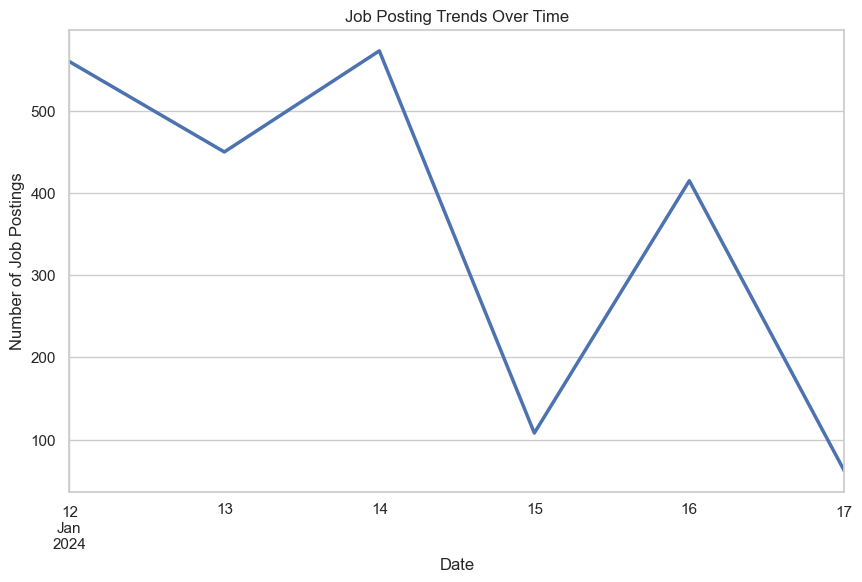

In [67]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
all_filtered['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=2.5)
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

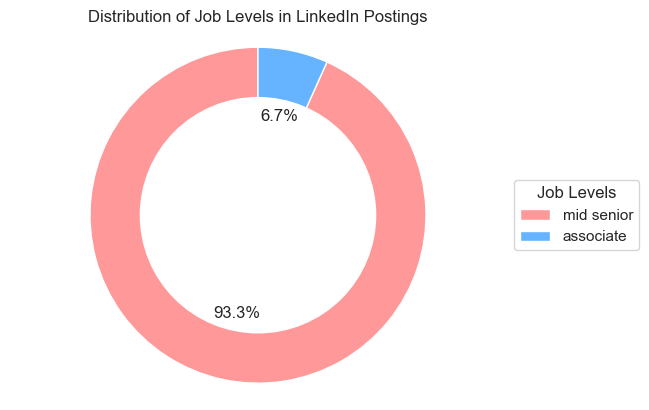

In [68]:
counts = all_filtered['job_level'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.legend(wedges, counts.index,
          title="Job Levels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Job Levels in LinkedIn Postings')
plt.show()

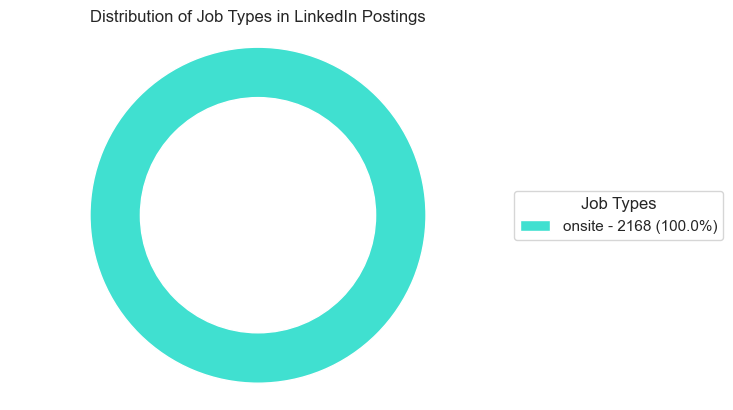

In [69]:
counts2 = all_filtered['job_type'].value_counts()


fig, ax = plt.subplots()
wedges, _ = ax.pie(counts2, startangle=90, colors=['#40E0D0','#FFD700','#FF6347'])


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  


labels = [f'{i} - {j} ({j/counts2.sum()*100:.1f}%)' for i,j in zip(counts2.index, counts2)]
plt.legend(wedges, labels,
          title="Job Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Job Types in LinkedIn Postings")
plt.show()

In [70]:
df = all_filtered

from collections import Counter

grouped_skills = df.groupby('job_title')['job_skills_list'].sum()

most_common_skills = grouped_skills.apply(lambda x: Counter(x).most_common(1))

data = []

for position, skills in most_common_skills.items():
    if skills:  
        data.append([position, skills[0][0], skills[0][1]])
    
df_most_common_skills = pd.DataFrame(data, columns=['job_title', 'Most Common Skill', 'Occurrences'])

In [71]:
df_most_common_skills.sort_values(by = 'Occurrences', ascending = False).head(10)

,job_title,Most Common Skill,Occurrences
510,senior data scientist,Python,104
644,senior robotics engineer,Resourcefulness,104
115,data scientist,Python,102
775,"staff machine learning engineer, series a",Python,94
612,senior machine learning engineer - ai,Feature Engineering,62
501,senior computer vision engineer,PyTorch,57
606,senior machine learning engineer,Python,54
294,machine learning engineer,Machine Learning,40
256,lead data scientist,Python,40
54,business intelligence developer,SQL,36


In [72]:
flat_skills = [skill.lower() for skills in all_filtered['job_skills_list'] for skill in skills]

In [73]:
from collections import Counter
counts = Counter(flat_skills)    
common_skills = counts.most_common(15)
common_skills

[('python', 1517),
 ('machine learning', 1506),
 ('sql', 760),
 ('data science', 747),
 ('tensorflow', 698),
 ('pytorch', 635),
 ('deep learning', 518),
 ('communication', 460),
 ('data analysis', 447),
 ('computer science', 428),
 ('data visualization', 409),
 ('statistics', 405),
 ('aws', 393),
 ('spark', 335),
 ('java', 317)]

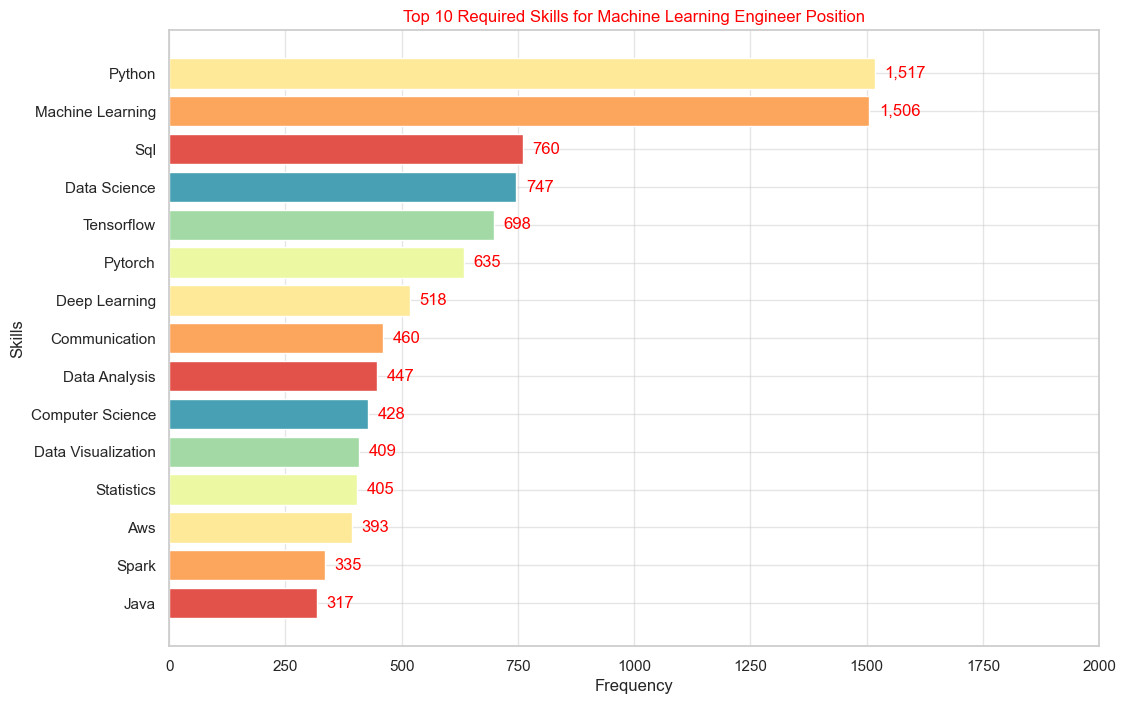

In [74]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 20
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 10 Required Skills for Machine Learning Engineer Position', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2000)
plt.show()

In [75]:
print(f"You need on average {int(all_filtered['skills_count'].median())} skills to apply for a Machine Learning Engineer job on LinkedIn")


You need on average 23 skills to apply for a Machine Learning Engineer job on LinkedIn


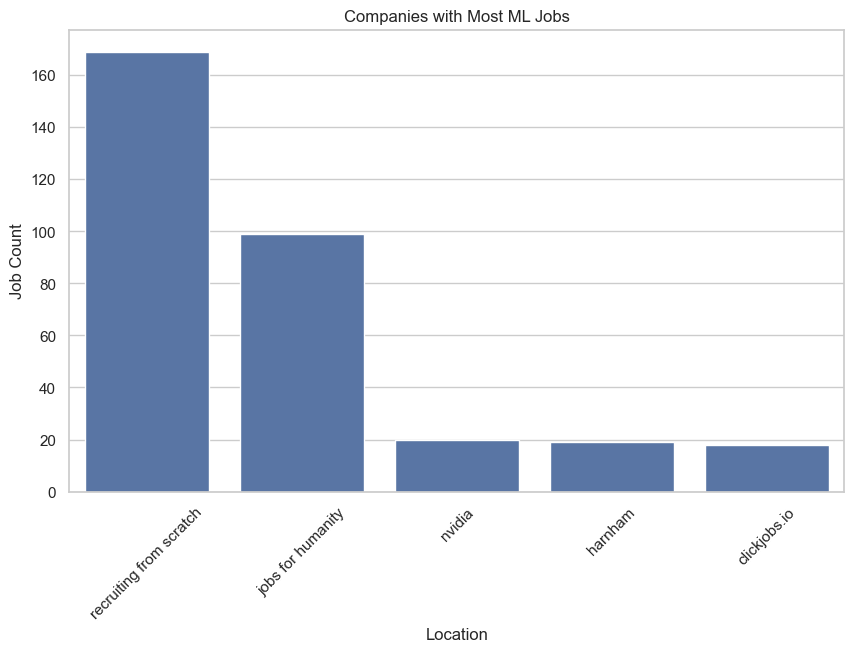

In [76]:
companies_ml_jobs = df[df["job_skills_list"].apply(lambda x: "Machine Learning" in x)]
top_companies = companies_ml_jobs["company"].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.xlabel("Location")
plt.ylabel("Job Count")
plt.title("Companies with Most ML Jobs")
plt.xticks(rotation=45)
plt.show()

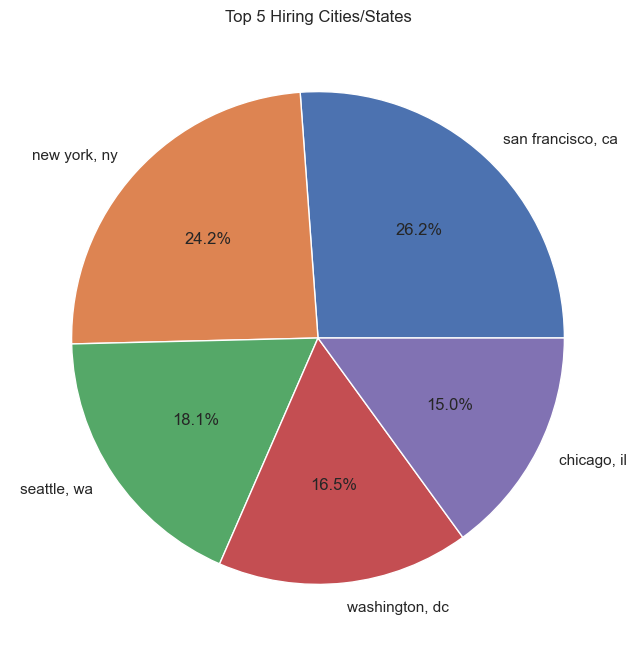

In [77]:
top_cities_states = df["job_location"].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cities_states, labels=top_cities_states.index, autopct="%1.1f%%")
plt.title("Top 5 Hiring Cities/States")
plt.show()